In [435]:
# On importe les librairie nécessaires à l'analyse statistique de nos données sur les thèmes.

import pandas as pd
import numpy as np 
from scipy import stats
from matplotlib import pyplot as plt

In [436]:
# Lecture du fichier 'df_sortie.csv' contenant les thèmes choisis  et vectorisés des réponses du questionnaire.

dataTheme = pd.read_csv('df_sortie.csv', sep='\t')

# On supprime la colonne inutile et on montre un bout du tableau :
del dataTheme['Unnamed: 0']
dataTheme.head()

,RomanFiction,BdComics,ArtsCulture,DocMedia,Erotisme,Esoterisme,SanteBE,HistGeo,Jeunesse,LittEtrangere,ScienceTechnique,LoisirVie,SHS,Philosophie
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [437]:
# On regarde combien de fois chaque thème a été coché dans le questionnaire :
poidsTheme = dataTheme.sum()
# On l'affiche :
poidsTheme

RomanFiction        1161
BdComics             414
ArtsCulture          172
DocMedia             189
Erotisme             138
Esoterisme            83
SanteBE              176
HistGeo              250
Jeunesse             251
LittEtrangere        486
ScienceTechnique      83
LoisirVie            129
SHS                  346
Philosophie          260
dtype: int64

In [438]:
# On classe ces thèmes par ordre croissant
valBarplot = np.sort(poidsTheme.values)

Text(0.5, 1.0, 'Classement par ordre décroissant des thèmes')

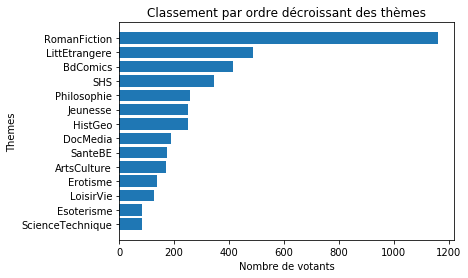

In [439]:
# On  crée un diagramme à barres représentant le classement des thèmes par nombre de votes

plt.barh(range(len(valBarplot)), valBarplot, height=0.8, align='center')
plt.yticks(range(len(valBarplot)), ['ScienceTechnique', 'Esoterisme', 'LoisirVie', 'Erotisme', 'ArtsCulture', 'SanteBE', 'DocMedia', 'HistGeo', 'Jeunesse', 'Philosophie', 'SHS', 'BdComics','LittEtrangere', 'RomanFiction'])
plt.xlabel('Nombre de votants')
plt.ylabel('Themes')
plt.title('Classement par ordre décroissant des thèmes')

In [440]:
# On observe maintenant le nombre de thèmes coché par chaque personne
nbThemeIndiv = dataTheme.sum(axis=1)
# En voici un extrait :
nbThemeIndiv.head(10)

0    2
1    2
2    3
3    1
4    3
5    2
6    6
7    3
8    1
9    5
dtype: int64

In [441]:
# Moyenne du nombre de thèmes choisis :
print(nbThemeIndiv.mean())

# Répartition en quartiles des votants en fonction du nombre de thèmes choisis
nbThemeIndiv.quantile([0.25, 0.5, 0.75])

3.235340109460516


0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64

In [442]:
# On trie les nombres de réponses par ordre croissant, on a ensortie un tableau et non plus une série
nbThemeIndiv = np.sort(nbThemeIndiv.values)
nbThemeIndiv

array([ 0,  0,  0, ..., 10, 10, 12])

Text(0.5, 1.0, 'boxplot avec sequence')

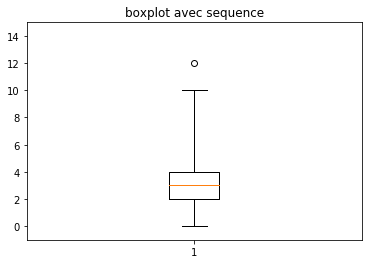

In [443]:
# Représentation de cette répartition par une boite à moustache :
plt.boxplot(nbThemeIndiv, whis=3)
plt.ylim(-1, 15)
plt.title('boxplot')

Text(0.5, 1.0, 'Histogramme nombre de thèmes choisis')

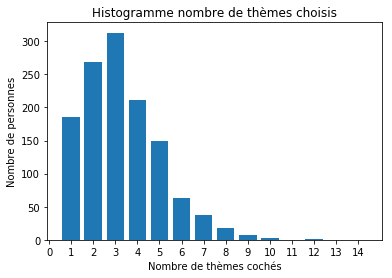

In [444]:
# On créer un histogramme repésentant la répartition du nombre de thème choisis par la population ayant répondu au questionnaire :

axes = plt.gca()
bins = [nbThemeIndiv + 0.5 for nbThemeIndiv in range(0, 15)]
plt.hist(nbThemeIndiv, bins = bins, rwidth = 0.8)
axes.xaxis.set_ticks(range(15))
plt.xlabel('Nombre de thèmes cochés')
plt.ylabel('Nombre de personnes')
plt.title('Histogramme nombre de thèmes choisis')

TypeError: 'Text' object is not callable

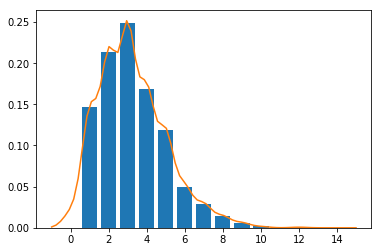

In [445]:
# On rend compte de cette répartition par le biais de probabilités :

kde = stats.gaussian_kde(nbThemeIndiv)
xx = np.linspace(-1, 15, 70)
plt, ax = plt.subplots()
bins = [nbThemeIndiv + 0.5 for nbThemeIndiv in range(0, 15)]
ax.hist(nbThemeIndiv, bins = bins, density='true', rwidth = 0.8)
ax.plot(xx, kde(xx))
ax.title('Répartitions des nombres de thèmes choisis par probabilité')